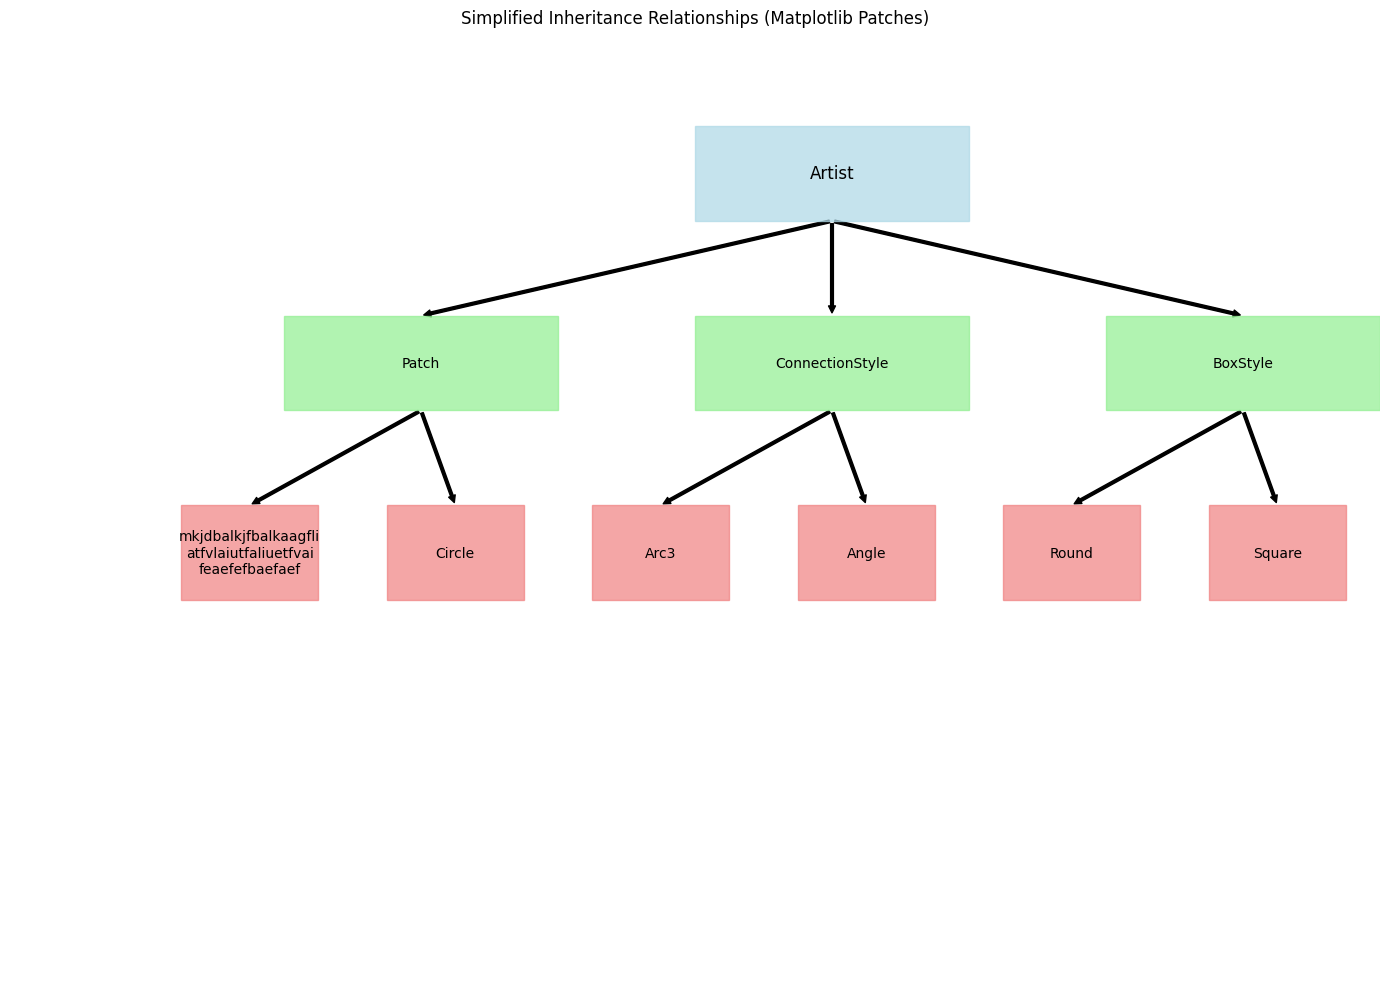

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import textwrap

def create_rectangle(ax, xy, width, height, color, alpha, text, fontsize):
    rect = matplotlib.patches.Rectangle(xy=xy, width=width, height=height, color=color, alpha=alpha, zorder=2)
    ax.add_patch(rect)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text, ha='center', va='center', fontsize=fontsize, zorder=3)
    return rect

def add_arrow(ax, start, end):
    arrow = matplotlib.patches.FancyArrowPatch(start, end, mutation_scale=10, color='black', zorder=1)
    ax.add_patch(arrow)

def plot_graph(graph, figsize=(14, 10), base_position=(0.5, 0.8), x_offset=0.3, y_offset=0.2):
    fig, ax = plt.subplots(figsize=figsize)

    # Create the base class rectangle
    base_x, base_y = base_position
    base_rect = create_rectangle(ax, (base_x, base_y), 0.2, 0.1, 'lightblue', 0.7, graph['base'], 12)
    
    # Create rectangles and arrows for child classes
    child_rects = []
    num_children = len(graph['children'])
    child_positions = [(base_x + (i - (num_children - 1) / 2) * x_offset, base_y - y_offset) for i in range(num_children)]
    for (child, grandchildren), (x, y) in zip(graph['children'].items(), child_positions):
        child_rect = create_rectangle(ax, (x, y), 0.2, 0.1, 'lightgreen', 0.7, child, 10)
        child_rects.append((child_rect, grandchildren))
        add_arrow(ax, (base_x + 0.1, base_y), (child_rect.get_x() + child_rect.get_width() / 2, child_rect.get_y() + child_rect.get_height()))

        # Create rectangles and arrows for grandchildren
        num_grandchildren = len(grandchildren)
        grandchild_positions = [(x + (j - (num_grandchildren - 1) / 2) * x_offset / 2, y - y_offset) for j in range(num_grandchildren)]
        for grandchild, (gx, gy) in zip(grandchildren, grandchild_positions):
            grandchild_rect = create_rectangle(ax, (gx, gy), 0.1, 0.1, 'lightcoral', 0.7, grandchild, 10)
            add_arrow(ax, (x + 0.1, y), (grandchild_rect.get_x() + grandchild_rect.get_width() / 2, grandchild_rect.get_y() + grandchild_rect.get_height()))

    # Set limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Class Hierarchy")
    ax.set_ylabel("Matplotlib Patch Types")

    # Remove axes and set title
    ax.axis('off')
    plt.title("Simplified Inheritance Relationships (Matplotlib Patches)", fontsize=12)
    plt.tight_layout()
    plt.show()

# Example graph structure with more depth
graph = {
    'base': 'Artist',
    'children': {
        'Patch': ['\n'.join(textwrap.wrap('mkjdbalkjfbalkaagfliatfvlaiutfaliuetfvaifeaefefbaefaef', 20)), 'Circle'],
        'ConnectionStyle': ['Arc3', 'Angle'],
        'BoxStyle': ['Round', 'Square']
    }
}

plot_graph(graph)
